#Uber_Data_Analysis
-Kiran K

CODE CLAUSE INTERNSHIP

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/UBER_DATA_ANALYSIS.csv')

In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/16 21:11,1/1/16 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/16 1:25,1/2/16 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/16 20:25,1/2/16 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/16 17:31,1/5/16 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/16 14:42,1/6/16 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df.describe()

,MILES*
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [ ]:
df.shape

(1155, 7)

In [ ]:
df.isnull().sum()


START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
cat_feat=[i for i in df.columns if df[i].dtype == 'O']
num_feat=[i for i in df.columns if df[i].dtype != 'O']
print("cat_feat:",cat_feat)
print("num_feat:",num_feat)

cat_feat: ['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'PURPOSE*']
num_feat: ['MILES*']


In [ ]:
for i in cat_feat:
  print(df[i].value_counts(normalize=True)*100)
  print('-'*100)


6/28/16 23:34     0.17316
1/1/16 21:11      0.08658
9/27/16 21:01     0.08658
9/27/16 13:21     0.08658
9/27/16 8:33      0.08658
                   ...   
5/27/16 20:47     0.08658
5/27/16 20:26     0.08658
5/23/16 21:09     0.08658
5/23/16 20:19     0.08658
12/31/16 22:08    0.08658
Name: START_DATE*, Length: 1154, dtype: float64
----------------------------------------------------------------------------------------------------
6/28/16 23:59     0.17316
1/1/16 21:17      0.08658
9/28/16 2:37      0.08658
9/27/16 14:43     0.08658
9/27/16 8:35      0.08658
                   ...   
5/27/16 20:53     0.08658
5/27/16 20:30     0.08658
5/23/16 21:21     0.08658
5/23/16 20:27     0.08658
12/31/16 23:51    0.08658
Name: END_DATE*, Length: 1154, dtype: float64
----------------------------------------------------------------------------------------------------
Business    93.333333
Personal     6.666667
Name: CATEGORY*, dtype: float64
--------------------------------------------------------

In [ ]:
df['PURPOSE*'].fillna("Unknown", inplace = True)


In [ ]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])


In [ ]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
df['Start_Month'] = df['START_DATE*'].dt.month_name()
df['Start_Day'] = df['START_DATE*'].dt.day_name()
df['Start_Hour'] = df['START_DATE*'].dt.hour
df["Trip_Duration"] = df['END_DATE*'] - df['START_DATE*']

In [ ]:
df=df.drop({'START_DATE*', 'END_DATE*'}, axis = 1)


#DATA ANALYSIS

<ipython-input-15-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

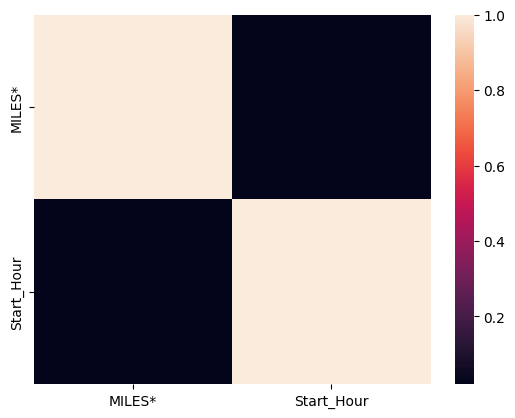

In [ ]:
sns.heatmap(df.corr())

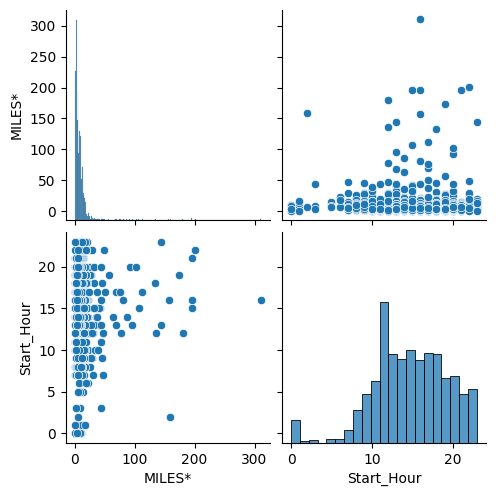

In [ ]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'The Mean of Miles for Each Starting Point')

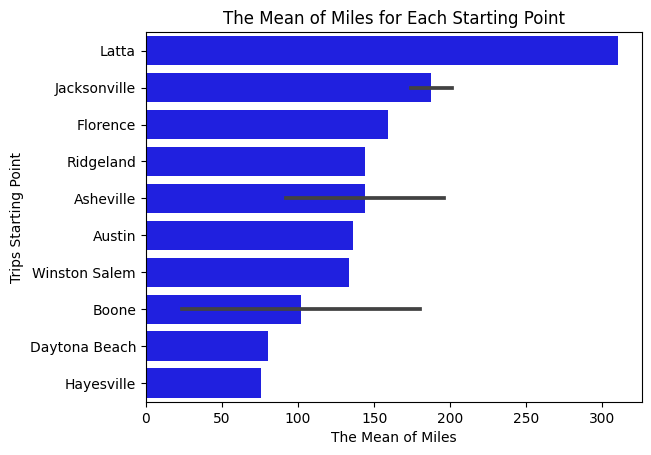

In [ ]:

sns.barplot(x =df['MILES*'] , y= df['START*'],
            order= df.groupby('START*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Starting Point")
plt.title("The Mean of Miles for Each Starting Point")


The starting point in Latta was the highest ever

Text(0.5, 1.0, 'The Mean of Miles for Each Ending Point')

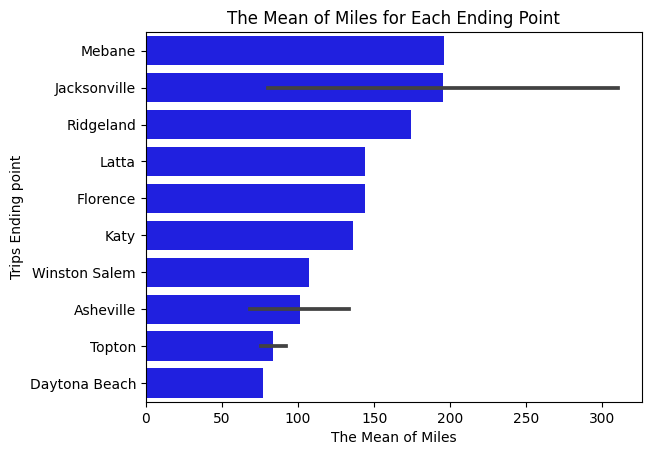

In [ ]:
sns.barplot(x =df['MILES*'] , y= df['STOP*'],
            order= df.groupby('STOP*')['MILES*'].mean().sort_values(ascending=False).nlargest(10).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trips Ending point")
plt.title("The Mean of Miles for Each Ending Point")

Many passangers have ended the journey at Mebane and Jacksonville compared to others

Text(0.5, 1.0, 'The Mean of Miles for Each Category')

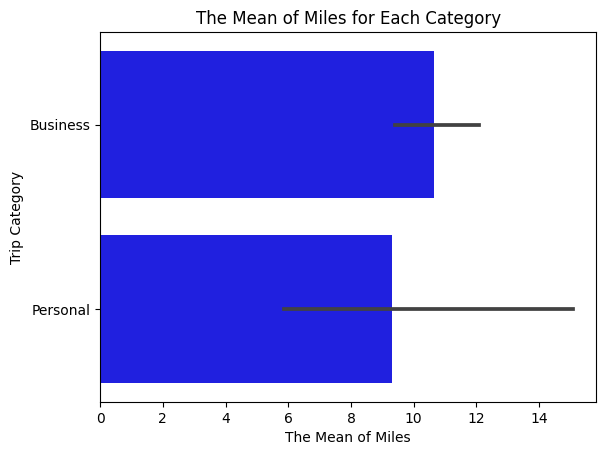

In [ ]:

sns.barplot(x =df['MILES*'] , y= df['CATEGORY*'],
            order= df.groupby('CATEGORY*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Category")
plt.title("The Mean of Miles for Each Category")


Text(0.5, 1.0, 'The Mean of Miles for Each Purpose')

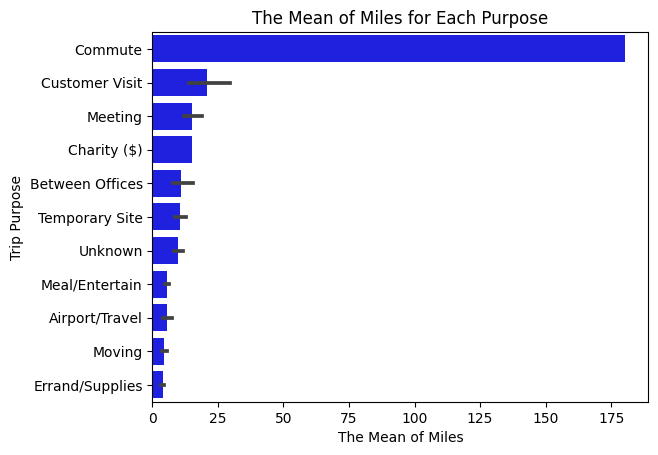

In [ ]:
sns.barplot(x =df['MILES*'] , y= df['PURPOSE*'],
            order= df.groupby('PURPOSE*')['MILES*'].mean().sort_values(ascending=False).index, color ="blue")
plt.xlabel("The Mean of Miles")
plt.ylabel("Trip Purpose")
plt.title("The Mean of Miles for Each Purpose")


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place')])

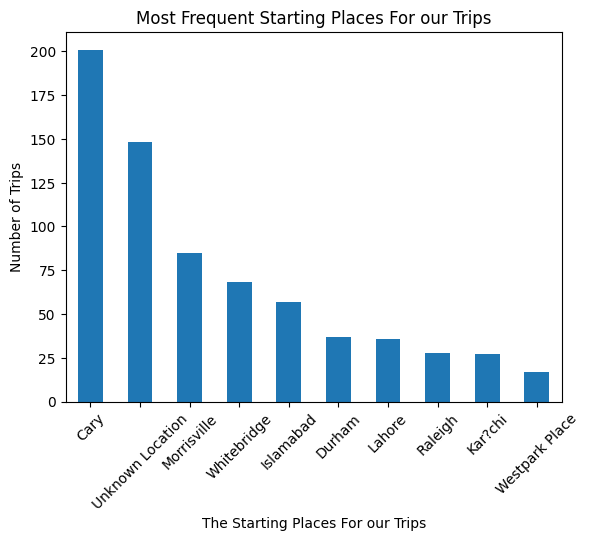

In [ ]:
df['START*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Starting Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Starting Places For our Trips")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex')])

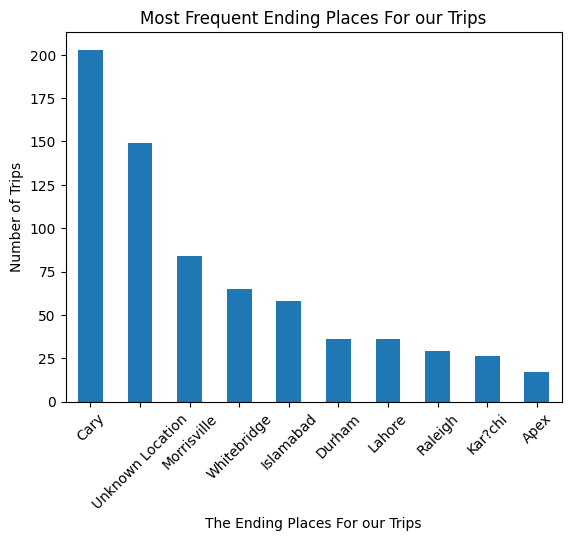

In [ ]:
df['STOP*'].value_counts().nlargest(10).plot(kind= "bar")
plt.xlabel("The Ending Places For our Trips")
plt.ylabel("Number of Trips")
plt.title("Most Frequent Ending Places For our Trips")
plt.xticks(rotation=45)

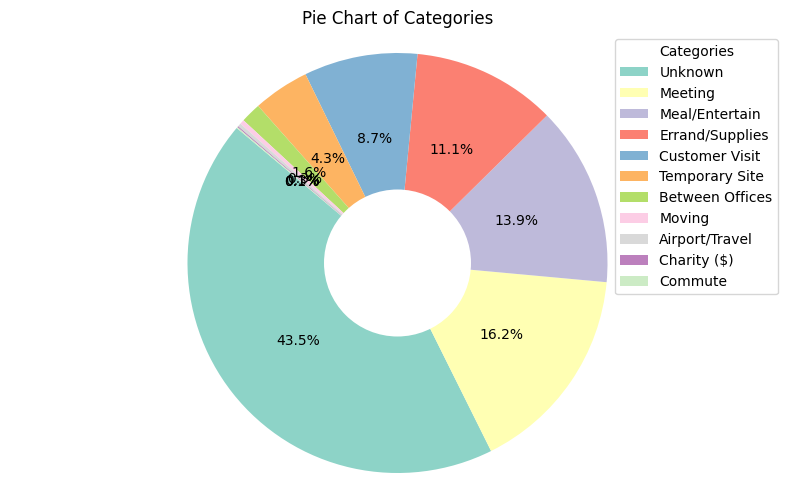

In [ ]:
category_counts = df['PURPOSE*'].value_counts()

sizes = category_counts.values
labels = category_counts.index
colors = plt.cm.Set3.colors

plt.figure(figsize=(10,6))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')

centre_circle = plt.Circle((0,0),0.35,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(labels, title='Categories', loc='best')
plt.title('Pie Chart of Categories')
plt.show()

In [ ]:
df.head()

,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Start_Month,Start_Day,Start_Hour,Trip_Duration
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21,0 days 00:06:00
1,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1,0 days 00:12:00
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20,0 days 00:13:00
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17,0 days 00:14:00
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,0 days 01:07:00


In [ ]:
df.isnull().sum()

CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*         0
Start_Month      0
Start_Day        0
Start_Hour       0
Trip_Duration    0
dtype: int64